<a href="https://colab.research.google.com/github/V1PASH/PYTORCH/blob/main/iris_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importing required libraries

In [ ]:
import torch
from torch  import nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
iris=pd.read_csv('/content/drive/MyDrive/RBU MCA/panda/IRIS.csv')
iris=iris.sample(n=len(iris))

In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris_x=iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
iris_y=iris['species']

In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris_x[:5]
iris_y[:5]

,species
83,Iris-versicolor
6,Iris-setosa
79,Iris-versicolor
35,Iris-setosa
28,Iris-setosa


In [ ]:
x=torch.tensor(iris_x.values)

In [ ]:
iris_y.unique()

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [ ]:
iris['species'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2],inplace=True)

<ipython-input-9-abd31111abdd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris['species'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2],inplace=True)


In [ ]:
iris[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
83,6.0,2.7,5.1,1.6,1
6,4.6,3.4,1.4,0.3,0
79,5.7,2.6,3.5,1.0,1
35,5.0,3.2,1.2,0.2,0
28,5.2,3.4,1.4,0.2,0


In [ ]:
iris_y=iris['species']

In [ ]:
y=torch.tensor(iris_y.values)

In [ ]:
y[:5]

tensor([1, 0, 1, 0, 0])

In [ ]:
x[:5]

tensor([[6.0000, 2.7000, 5.1000, 1.6000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.7000, 2.6000, 3.5000, 1.0000],
        [5.0000, 3.2000, 1.2000, 0.2000],
        [5.2000, 3.4000, 1.4000, 0.2000]], dtype=torch.float64)

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
83,6.0,2.7,5.1,1.6,1
6,4.6,3.4,1.4,0.3,0
79,5.7,2.6,3.5,1.0,1
35,5.0,3.2,1.2,0.2,0
28,5.2,3.4,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [ ]:
x_train.shape

torch.Size([127, 4])

### device Agnostic code


and accuracy fn


In [ ]:
device="cuda" if torch.cuda.is_available else "cpu"

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc =(correct/len(y_pred))*100
  return acc

In [ ]:
import requests

from pathlib import Path

# download helper function from pytorch repo

if Path("helper_function.py").is_file():
  print("have")
else:
  print("download")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb")as f:
    f.write(request.content)

download


In [ ]:
from helper_functions import plot_predictions ,plot_decision_boundary

### Creating model

In [ ]:
class iris_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers=nn.Sequential(
        nn.Linear(in_features=4,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=3)
    )

  def forward(self,x):
      return self.layers(x)

In [ ]:
model0=iris_model()

In [ ]:
model0.eval()

with torch.inference_mode():
  y_logits=model0(x_test.type(torch.float))

In [ ]:
y_pred_probs=torch.softmax(y_logits,dim=1)

In [ ]:
y_pred_probs[:5]

tensor([[0.2675, 0.3426, 0.3898],
        [0.2641, 0.3533, 0.3826],
        [0.2676, 0.3425, 0.3899],
        [0.2644, 0.3526, 0.3830],
        [0.2648, 0.3516, 0.3837]])

In [ ]:
y_preds=torch.argmax(y_pred_probs,dim=1)

In [ ]:
y_preds

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Training loop

In [ ]:
loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model0.parameters(),lr=0.01)

In [ ]:
torch.manual_seed(42)

epochs=5000

for epoch in range(epochs):
  model0.train()

  y_logits=model0(x_train.type(torch.float))

  y_preds=torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss=loss_fn(y_logits,y_train)

  acc=accuracy_fn(y_true=y_train
                  ,y_pred=y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model0.eval()
  with torch.inference_mode():
    test_logits=model0(x_test.type(torch.float))
    test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_preds)

  if epoch%1000==0:
    print(f" epoch {epoch} || loss {loss:.4f} acc {acc:.4f} || test {test_loss :.4f} acc {test_acc:.4f}")

 epoch 0 || loss 0.0249 acc 99.2126 || test 0.1487 acc 95.6522
 epoch 1000 || loss 0.0379 acc 98.4252 || test 0.4037 acc 91.3043
 epoch 2000 || loss 0.0198 acc 99.2126 || test 0.3789 acc 91.3043
 epoch 3000 || loss 0.0195 acc 99.2126 || test 0.3772 acc 91.3043
 epoch 4000 || loss 0.0182 acc 100.0000 || test 0.2459 acc 91.3043


In [ ]:
model0.eval()

with torch.inference_mode():
  y_logits=model0(x_test.type(torch.float))

In [ ]:
y_pred_probs=torch.softmax(y_logits,dim=1).argmax(dim=1)

In [ ]:
y_pred_probs

tensor([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0])

In [ ]:
print(y_test==y_pred_probs)

tensor([False,  True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True])


In [ ]:
x.size()

torch.Size([150, 4])

##Savig model

In [ ]:
model_path=Path("Iris_model")
model_path.mkdir(parents=True,exist_ok=True)

model_name="Iris_model_trained"

model_save_path=model_path/model_name

torch.save(obj=model0.state_dict(),f=model_save_path)

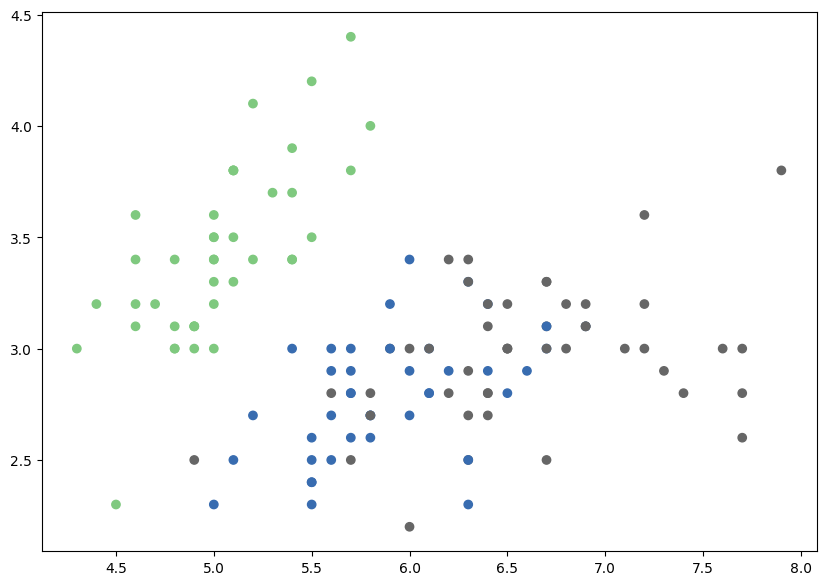

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.Accent)

In [ ]:
model0.eval()

with torch.inference_mode():
  logits=model0(x_train.type(torch.float))

pred_probs=torch.softmax(logits,dim=1).argmax(dim=1)

In [ ]:
print(y_train==pred_probs)

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10201x2 and 4x10)

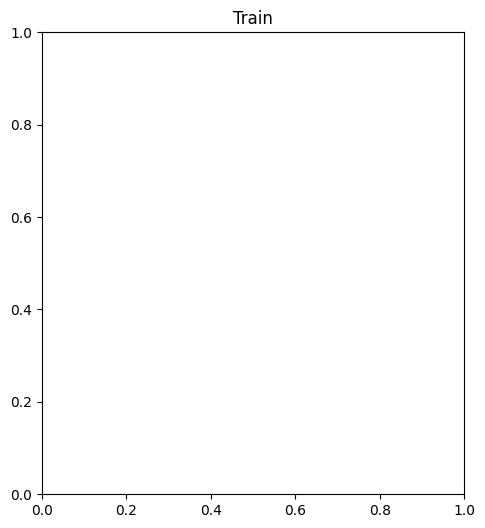

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model0, x_train, y_train)